In [16]:
pip install matplotlib.plt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.plt (from versions: none)
ERROR: No matching distribution found for matplotlib.plt

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\vedica\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
import os

In [2]:
PATH='.\dataset3\manifest-7qRRRBGo6029235898952856192'

In [3]:
data_df1 = pd.read_csv(os.path.join(PATH,"metadata.csv"))
data_df2 = pd.read_csv(os.path.join(PATH,"LungCT-Diagnosis_MetaData.csv"))
data_df1['File Location'] = data_df1['File Location'].str.replace('\\', '/')

In [4]:
print("CT Medical images -  rows:",data_df1.shape[0]," columns:", data_df1.shape[1])

CT Medical images -  rows: 61  columns: 17


In [5]:
data_df1.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.4320.5030.108377250346...,LungCT-Diagnosis,NaN,https://doi.org/10.7937/K9/TCIA.2015.A6V7JIWX,R_013,1.3.6.1.4.1.14519.5.2.1.4320.5030.858893877330...,Diagnostic Pre-Surgery Contrast Enhanced CT,02-09-1997,NONE,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,67,35.33 MB,./LungCT-Diagnosis/R_013/02-09-1997-NA-Diagnos...,2023-11-03T16:52:09.952
1,1.3.6.1.4.1.14519.5.2.1.4320.5030.966354075876...,LungCT-Diagnosis,NaN,https://doi.org/10.7937/K9/TCIA.2015.A6V7JIWX,R_004,1.3.6.1.4.1.14519.5.2.1.4320.5030.248552508121...,Diagnostic Pre-Surgery Contrast Enhanced CT,06-30-1997,NONE,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,68,35.85 MB,./LungCT-Diagnosis/R_004/06-30-1997-NA-Diagnos...,2023-11-03T16:52:15.046
2,1.3.6.1.4.1.14519.5.2.1.4320.5030.858665305863...,LungCT-Diagnosis,NaN,https://doi.org/10.7937/K9/TCIA.2015.A6V7JIWX,R_019,1.3.6.1.4.1.14519.5.2.1.4320.5030.188933890086...,Diagnostic Pre-Surgery Contrast Enhanced CT,01-13-1996,NONE,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,63,33.22 MB,./LungCT-Diagnosis/R_019/01-13-1996-NA-Diagnos...,2023-11-03T16:54:58.643
3,1.3.6.1.4.1.14519.5.2.1.4320.5030.113686129632...,LungCT-Diagnosis,NaN,https://doi.org/10.7937/K9/TCIA.2015.A6V7JIWX,R_006,1.3.6.1.4.1.14519.5.2.1.4320.5030.203059346048...,Diagnostic Pre-Surgery Contrast Enhanced CT,09-24-1998,NONE,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,130,68.56 MB,./LungCT-Diagnosis/R_006/09-24-1998-NA-Diagnos...,2023-11-03T16:56:18.159
4,1.3.6.1.4.1.14519.5.2.1.4320.5030.195727395237...,LungCT-Diagnosis,NaN,https://doi.org/10.7937/K9/TCIA.2015.A6V7JIWX,R_014,1.3.6.1.4.1.14519.5.2.1.4320.5030.231039938881...,Diagnostic Pre-Surgery Contrast Enhanced CT,04-11-1998,NONE,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,76,40.08 MB,./LungCT-Diagnosis/R_014/04-11-1998-NA-Diagnos...,2023-11-03T16:56:34.46


Reading DICOM files

In [6]:
def load_dicom_slices(folder_path):
    dicom_slices = []
    PatientID=0;
    for filename in os.listdir(folder_path):
       if filename.endswith('.dcm'):  # Assuming all DICOM files have a .dcm extension
          dicom_file_path = os.path.join(folder_path, filename)

          # Read DICOM file
          dicom_data = dicom.dcmread(dicom_file_path)
          dicom_slices.append(dicom_data)
          PatientID = dicom_data.PatientID
    print(len(dicom_slices))
    print(PatientID)
    return dicom_slices

In [7]:
def extract_pixel_data_and_spacing(dicom_slices):
    # Extract pixel data from each DICOM slice
    pixel_data_list = [dicom_slice.pixel_array for dicom_slice in dicom_slices]

    # Extract spacing information (assuming isotropic spacing)
    pixel_spacing = dicom_slices[0].PixelSpacing
    slice_spacing = dicom_slices[0].SliceThickness
    spacing = (float(pixel_spacing[0]), float(pixel_spacing[1]), float(slice_spacing))

    return np.stack(pixel_data_list, axis=-1), spacing

In [8]:
def extract_patient_id(file_location):
    parts = file_location.split("/")
    for part in parts:
        if "_" in part:
            return part

In [9]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16),
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0

    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):

        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope

        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)

        image[slice_number] += np.int16(intercept)

    return np.array(image, dtype=np.int16)

In [10]:
def load_patient_data(data_folder):
    patient_data = []

    for index, row in data_df1.iterrows():
     patient_path = row['File Location']
     #patient_path = patient_path.lstrip('./')
     folder_path = os.path.join(PATH, patient_path)

     if os.path.isdir(folder_path):
          patient_id = extract_patient_id(patient_path)
          patient_info = {"patient_id": patient_id, "slices": []}

          # Load DICOM slices for the patient
          dicom_slices = load_dicom_slices(folder_path)
          # Extract pixel data and spacing
          pixel_data, spacing = extract_pixel_data_and_spacing(dicom_slices)

          # Store the data in the patient_info dictionary
          patient_info["pixel_data"] = get_pixels_hu(dicom_slices)
          patient_info["spacing"] = spacing

          for idx, slice_data in enumerate(dicom_slices):
            patient_info["slices"].append({"slice_number": idx, "slice_data": slice_data})
          patient_data.append(patient_info)
    return patient_data

# Example usage
data_folder = PATH
#print(data_folder)
all_patient_data = load_patient_data(data_folder)

67
R_013
68
R_004
63
R_019
130
R_006
76
R_014
80
R_022
109
R_029
67
R_033
65
R_036
104
R_053
111
R_043
62
R_056
70
R_061
63
R_064
69
R_065
98
R_066
118
R_069
112
R_075
78
R_117
86
R_124
71
R_126
65
R_143
110
R_141
93
R_144
77
R_150
87
R_146
34
R_157
24
R_172
63
R_170
108
R_210
62
R_214
76
R_209
79
R_208
74
R_232
65
R_233
68
R_237
69
R_239
65
R_256
58
R_259
40
R_267
93
R_266
62
R_273
74
R_274
74
R_035
49
R_077
65
R_093
87
R_078
150
R_020
55
R_102
88
R_098
66
R_108
68
R_127
83
R_111
115
R_116
69
R_137
62
R_175
76
R_191
62
R_185
68
R_180
59
R_193


Working on Resampling of data

In [11]:
import scipy.ndimage

In [12]:
import numpy as np
import scipy.ndimage
import pydicom

def resample(image, scan, new_spacing=[1, 1, 1]):
    # Determine current pixel spacing
    # Convert MultiValue to a list for concatenation
    pixel_spacing_list = list(scan[0]['slice_data'].PixelSpacing)
    
    # Concatenate SliceThickness and PixelSpacing lists
    spacing = np.array([scan[0]['slice_data'].SliceThickness] + pixel_spacing_list, dtype=np.float32)

    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor

    # Perform voxel resampling
    resampled_image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')

    return resampled_image, new_spacing


In [14]:
from scipy.ndimage import median_filter

In [15]:
resampled_data=[]
count=0
for patient_info in all_patient_data:
    # Get pixel data, spacing, and other information from the patient_info dictionary
    pixel_data = patient_info["pixel_data"]
    spacing = patient_info["spacing"]
    patient_id = patient_info["patient_id"]
    slices = patient_info["slices"]  # Add other fields as needed
    # Perform voxel resampling

    # Call the resample function
    resampled_pixel_data, new_spacing = resample(pixel_data, slices, new_spacing=[1.0, 1.0, 1.0])


    #Apply median filtering
    filtered_pixel_data = median_filter(resampled_pixel_data, size=3)
    count=count+1
    print(count)
    # Create a new dictionary for resampled data
    resampled_patient_info = {
        "patient_id": patient_id,
        "slices": slices,
        "resampled_pixel_data": filtered_pixel_data,
        "resampled_spacing": new_spacing
    }

    # Append the resampled data to the new list
    resampled_data.append(resampled_patient_info)

C:\Users\vedica\AppData\Local\Temp\ipykernel_22468\1717014595.py:20: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  resampled_image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


Visualizing the orignal image and after applying median filtering

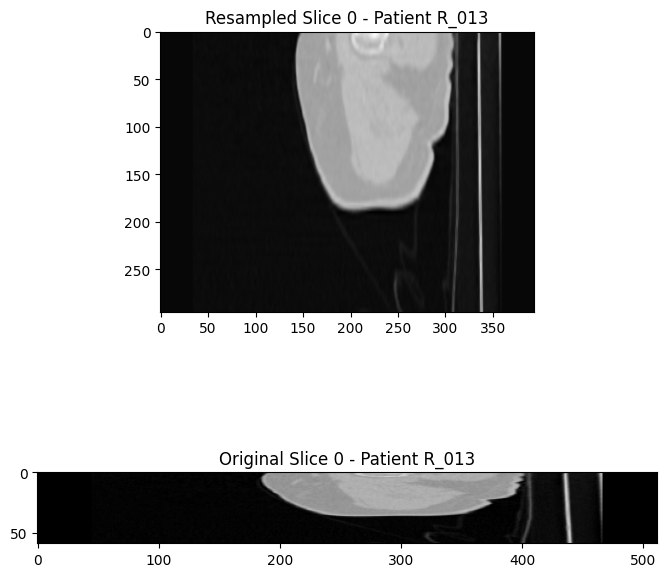

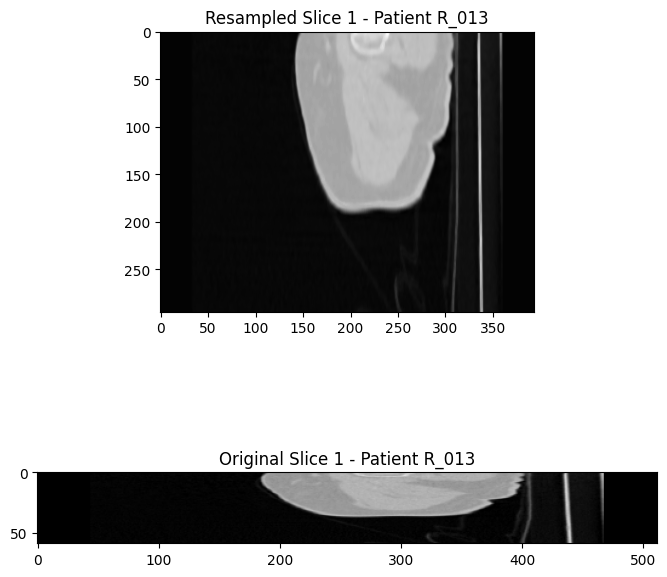

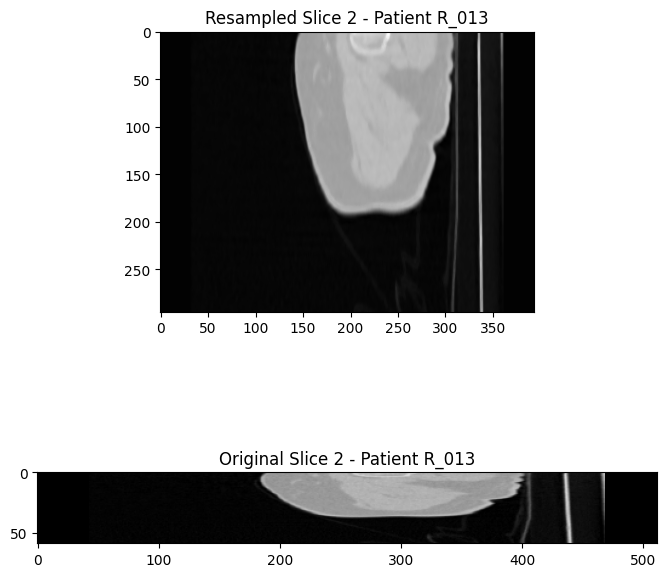

In [25]:
import matplotlib.pyplot as plt

# Assuming 'resampled_data' is your list of resampled patient information

# Choose a patient index for visualization
patient_index = 0  # Change this to the desired patient index

# Extract relevant information for visualization
patient_info1 = resampled_data[patient_index]
patient_info2 = all_patient_data[patient_index]
patient_id = patient_info1["patient_id"]
resampled_pixel_data = resampled_patient_info["resampled_pixel_data"]
pixel_data = patient_info["pixel_data"]  # Assuming you saved the filtered data here

# Display slices from the resampled and filtered data
num_slices = resampled_pixel_data.shape[-1]  # Assuming slices are along the last dimension

# Choose slices for visualization (e.g., the first three slices)
slices_to_visualize = range(3)

# Plot each selected slice
for slice_index in slices_to_visualize:
    plt.figure(figsize=(8, 8))
    
    # Original resampled slice
    plt.subplot(2, 1, 1)
    plt.imshow(resampled_pixel_data[:, :, slice_index], cmap='gray')
    plt.title(f"Resampled Slice {slice_index} - Patient {patient_id}")

    # Filtered slice
    plt.subplot(2, 1, 2)
    plt.imshow(pixel_data[:, :, slice_index], cmap='gray')
    plt.title(f"Original Slice {slice_index} - Patient {patient_id}")

    plt.show()


Applying intensity thresholding for binary mask generation

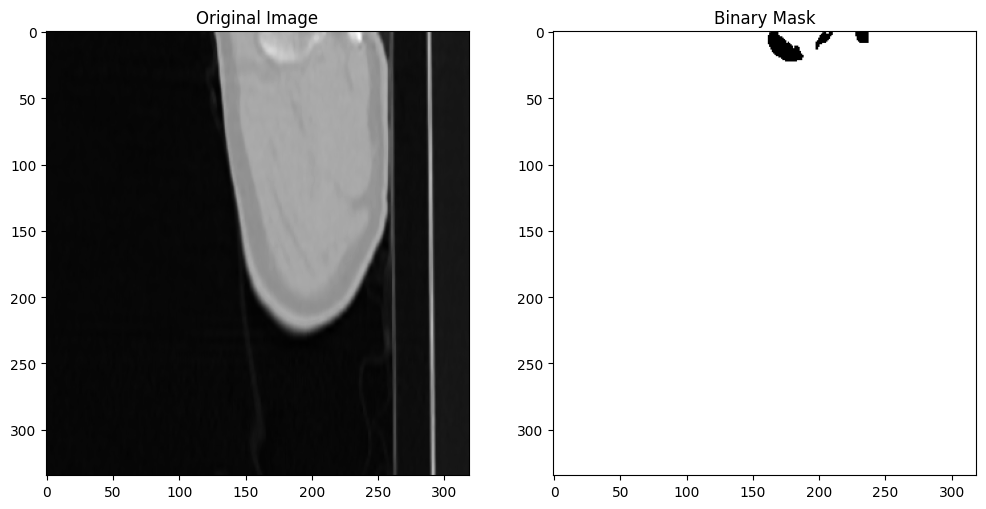

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'filtered_pixel_data' is your filtered pixel data from one patient
# You can adjust the patient index as needed
patient_index = 0
filtered_pixel_data = resampled_data[patient_index]["resampled_pixel_data"]

# Choose a threshold value (you can adjust this based on your data)
threshold_value = 150

# Apply intensity thresholding to create a binary mask
binary_mask = (filtered_pixel_data > threshold_value).astype(np.uint8)

# Visualize the original image and the binary mask
slice_index = 0  # Choose the slice index for visualization
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(filtered_pixel_data[:, :, slice_index], cmap='gray')
plt.title("Original Image")

# Binary mask
plt.subplot(1, 2, 2)
plt.imshow(binary_mask[:, :, slice_index], cmap='binary')
plt.title("Binary Mask")

plt.show()


Applying Connected Component Analysis

In [ ]:
from skimage import measure

def connected_component_analysis(dicom_file_path, threshold_value=150):
    # Read the DICOM file
    dicom_data = pydicom.dcmread(dicom_file_path)

    # Extract pixel data
    pixel_data = dicom_data.pixel_array

    # Apply intensity thresholding
    binary_mask = (pixel_data > threshold_value).astype(np.uint8)

    # Perform connected component analysis
    labeled_mask = measure.label(binary_mask, connectivity=2)

    # Display the original image, binary mask, and labeled mask
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(pixel_data, cmap='gray')
    plt.title("Original Image")

    # Binary mask
    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='binary')
    plt.title("Binary Mask (Intensity Thresholding)")

    # Labeled mask
    plt.subplot(1, 3, 3)
    plt.imshow(labeled_mask, cmap='jet')  # 'jet' colormap for visualization
    plt.title("Connected Components")

    plt.show()



In [ ]:
# Replace 'path_to_your_dicom_file.dcm' with the actual path to your DICOM file
dicom_file_path = 'path_to_your_dicom_file.dcm'
connected_component_analysis(dicom_file_path)

Applying Morphological Operations

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from scipy.ndimage import binary_erosion, binary_dilation

def morphological_operations(dicom_file_path, threshold_value=150):
    # Read the DICOM file
    dicom_data = pydicom.dcmread(dicom_file_path)

    # Extract pixel data
    pixel_data = dicom_data.pixel_array

    # Apply intensity thresholding
    binary_mask = (pixel_data > threshold_value).astype(np.uint8)

    # Perform connected component analysis
    labeled_mask = measure.label(binary_mask, connectivity=2)

    # Apply morphological operations (erosion and dilation)
    eroded_mask = binary_erosion(labeled_mask, structure=np.ones((3, 3)))
    dilated_mask = binary_dilation(eroded_mask, structure=np.ones((5, 5)))

    # Display the original image, binary mask, labeled mask, and processed mask
    plt.figure(figsize=(18, 5))

    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(pixel_data, cmap='gray')
    plt.title("Original Image")

    # Binary mask
    plt.subplot(1, 4, 2)
    plt.imshow(binary_mask, cmap='binary')
    plt.title("Binary Mask (Intensity Thresholding)")

    # Labeled mask
    plt.subplot(1, 4, 3)
    plt.imshow(labeled_mask, cmap='jet')  # 'jet' colormap for visualization
    plt.title("Connected Components")

    # Processed mask after morphological operations
    plt.subplot(1, 4, 4)
    plt.imshow(dilated_mask, cmap='jet')  # 'jet' colormap for visualization
    plt.title("Processed Mask (Morphological Operations)")

    plt.show()

# Replace 'path_to_your_dicom_file.dcm' with the actual path to your DICOM file
dicom_file_path = 'path_to_your_dicom_file.dcm'
morphological_operations(dicom_file_path)


Working on Edge Detection

Refining Binary Mask using erosion and dilation